In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('C:/Users/nsgoo/OneDrive/Documents/School/WGU/WGU_data/Medical/medical_clean.csv')

In [4]:
df.rename(columns = {'Item1':'TimelyA', 'Item2':'TimelyT', 'Item3':'TimelyV', 'Item4':'Reliability', 'Item5': 'Options', 'Item6':'HoT', 'Item7':'Courteous','Item8':'ActiveLis'}, inplace = True)

In [5]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,TimelyA,TimelyT,TimelyV,Reliability,Options,HoT,Courteous,ActiveLis
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [6]:
df = df.drop(['Children', 'Income', 'Marital', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Services', 'TotalCharge', 'Additional_charges', 'BackPain','Anxiety', 'CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job'], axis = 1)

In [7]:
#reorder list for ease of preview
df = df[['Initial_days', 'Age', 'Gender', 'ReAdmis','Doc_visits', 'Initial_admin', 'Overweight', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis']]

In [8]:
my_list = df.columns.values.tolist()
print(my_list)

['Initial_days', 'Age', 'Gender', 'ReAdmis', 'Doc_visits', 'Initial_admin', 'Overweight', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis']


In [9]:
df.to_csv('C:/Users/nsgoo/OneDrive/Documents/School/WGU/d208_predictive_modeling/medical_cleaned208.csv')

Index(['Initial_days', 'Age', 'Doc_visits', 'TimelyA', 'TimelyT', 'TimelyV',
       'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis'],
      dtype='object')


<Figure size 720x1440 with 0 Axes>

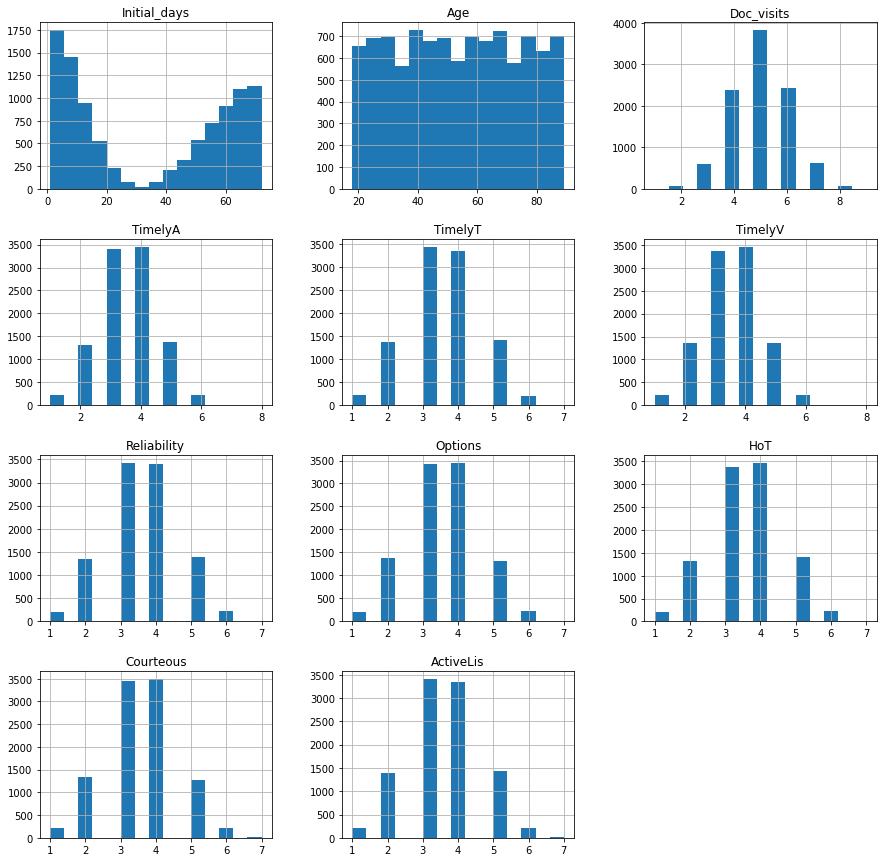

In [10]:
# Columns for numerical data
NumericalData = df.select_dtypes(include = "number").columns
print (NumericalData)
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[NumericalData].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()
# Create boxplots

<AxesSubplot:>

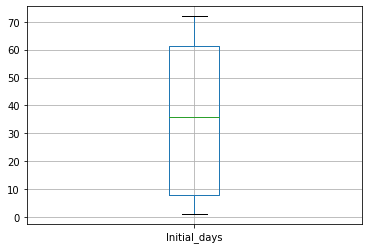

In [11]:
df.boxplot(['Initial_days'])

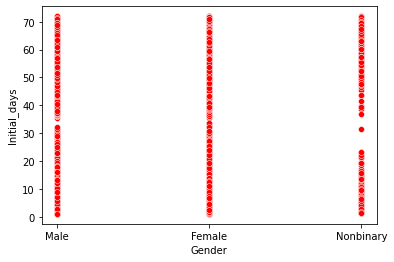

In [12]:
sns.scatterplot(x = df['Gender'],y = df['Initial_days'],color = 'red')
plt.show()

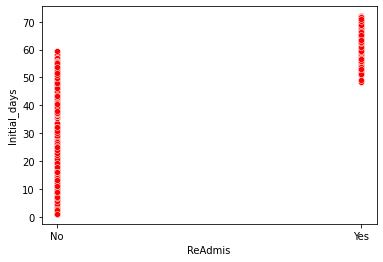

In [13]:
sns.scatterplot(x = df['ReAdmis'],y = df['Initial_days'],color = 'red')
plt.show()

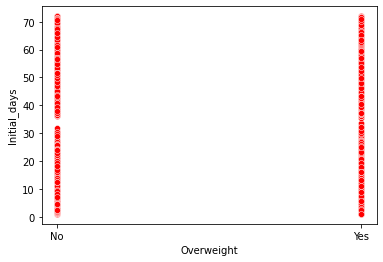

In [14]:
sns.scatterplot(x = df['Overweight'],y = df['Initial_days'],color = 'red')
plt.show()

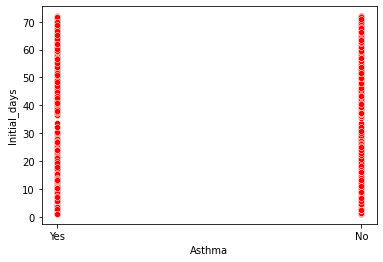

In [15]:
sns.scatterplot(x = df['Asthma'],y = df['Initial_days'],color = 'red')
plt.show()

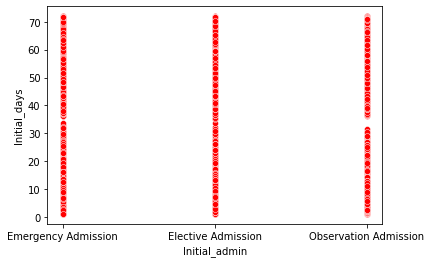

In [16]:
sns.scatterplot(x = df['Initial_admin'],y = df['Initial_days'],color = 'red')
plt.show()

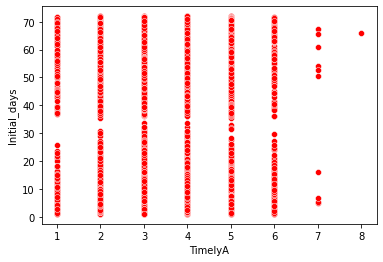

In [17]:
sns.scatterplot(x = df['TimelyA'],y = df['Initial_days'],color = 'red')
plt.show()

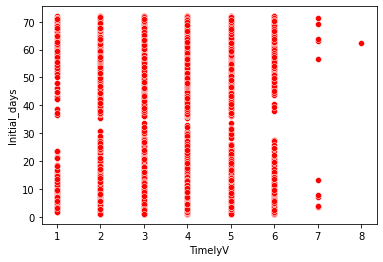

In [18]:
sns.scatterplot(x = df['TimelyV'],y = df['Initial_days'],color = 'red')
plt.show()

In [21]:
df['intercept'] = 1
ols_x = pd.DataFrame(df['Initial_days']).to_numpy()
ols_y = pd.DataFrame(df[['Age', 'Gender', 'ReAdmis', 'Doc_visits', 'Initial_admin', 'Overweight', 'Asthma', 'TimelyA', 'TimelyT', 'TimelyV', 'Reliability', 'Options', 'HoT', 'Courteous', 'ActiveLis', 'intercept']]).to_numpy()

In [22]:
model = sm.OLS(ols_x, ols_y).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1756.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:52:47   Log-Likelihood:                -40430.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9984   BIC:                         8.101e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0033      0.007      0.498      0.6